# Examples of plotting TrackRun subsets

Import the necessary modules

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

from octant.core import TrackRun, OctantTrack, HOUR

To save time, in this example `lcc_map` function from `arke` package is used to create a map in Lambert Conformal Conic projection.

`arke` can be installed by running
```bash
pip install git+https://github.com/dennissergeev/arke.git
```
Note: it requires [iris](http://scitools.org.uk/iris/) package to be installed too.

Alternatively, there are plenty of examples in `cartopy` docs on how to create geoaxes.

In [2]:
try:
    from arke.cart import lcc_map
except ImportError:
    # arke package is not installed or fails to import
    # so let's define lcc_map() instead
    
    def lcc_map(fig, subplot_grd=111, clon=None, clat=None, coast=None, extent=None):
        """ Create cartopy axes in Lambert Conformal projection """
        proj = ccrs.LambertConformal(central_longitude=clon,
                                     central_latitude=clat)

        # Draw a set of axes with coastlines:
        ax = fig.add_subplot(subplot_grd, projection=proj)
        if isinstance(extent, list):
            ax.set_extent(extent, crs=ccrs.PlateCarree())
        if isinstance(coast, dict):
            feature = cartopy.feature.NaturalEarthFeature(name='coastline',
                                                          category='physical',
                                                          **coast)
            ax.add_feature(feature)
        return ax

Some useful declarations...

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)  # change the default figure size
COAST = dict(scale='50m', alpha=0.5,
             edgecolor='#333333', facecolor='#AAAAAA')
clon = 10
clat = 75
extent = [-20, 50, 65, 85]
LCC_KW = dict(clon=clon, clat=clat, coast=COAST, extent=extent)

mapkw = dict(transform=ccrs.PlateCarree())

Define the common data directory

In [4]:
sample_dir = Path('.') / 'sample_data'

Data are usually organised in hierarchical directory structure. Here, the relevant parameters are defined.

In [5]:
dataset = 'era5'
period = 'test'
run_id = 0

Construct the full path

In [6]:
track_res_dir = sample_dir / dataset / f'run{run_id:03d}' / period

## Load the data

Load land-sea mask array from ERA5 dataset:

In [7]:
lsm = xr.open_dataarray(sample_dir / dataset / 'lsm.nc')
lsm = lsm.squeeze()  # remove singular time dimension

Now load the cyclone tracks themselves

In [8]:
TR = TrackRun(track_res_dir)

... and classify them

In [9]:
TR.categorise(lsm=lsm, filt_by_dist=False, filt_by_land=True, filt_by_domain_bounds=True, coast_rad=50)

Here's what 'PMC' subset looks like after classification. Level-0 Multi-Index (`track_idx`) is preserved, i.e. indices are not reset to 0 for each subset.

In [10]:
TR['pmc']

lon   lat       vo                time         area  \
track_idx row_idx                                                         
41        0       -12.6  78.0  0.20968 2011-01-01 21:00:00  20232.74414   
          1       -12.0  78.0  0.22679 2011-01-01 22:00:00  16825.84180   
          2       -11.7  78.0  0.21815 2011-01-01 23:00:00  17266.85547   
          3       -10.8  78.0  0.20942 2011-01-02 00:00:00  15561.05469   
          4        -9.3  78.3  0.21904 2011-01-02 01:00:00  16494.07031   
          5        -8.7  78.3  0.22581 2011-01-02 02:00:00  16279.27539   
          6        -8.1  78.3  0.22272 2011-01-02 03:00:00  15351.86328   
          7        -7.5  78.3  0.21894 2011-01-02 04:00:00  15051.43359   
          8        -7.5  77.7  0.22186 2011-01-02 05:00:00  15286.41406   
          9        -7.2  77.7  0.21342 2011-01-02 06:00:00  15692.66797   
          10       -6.9  77.7  0.20051 2011-01-02 07:00:00  14934.23242   
          11       -6.3  78.9  0.20879 2011-01-02 08:00:00  15017.20410   
          12       -6.0  78.9  0.21628 2011-01-02 09:00:00  12890.33105   
          13       -5.4  78.9  0.21296 2011-01-02 10:00:00  11934.25684   
          14       -5.4  78.9  0.21615 2011-01-02 11:00:00  11401.68164   
          15       -5.1  78.9  0.20400 2011-01-02 12:00:00  10780.51172   
70        0        -2.1  67.5  0.27889 2011-01-03 07:00:00  20086.14453   
          1        -2.1  67.8  0.28835 2011-01-03 08:00:00  38513.68359   
          2        -2.4  68.1  0.29637 2011-01-03 09:00:00  22139.31250   
          3        -1.2  67.5  0.33707 2011-01-03 10:00:00  23662.71094   
          4        -0.9  67.5  0.36387 2011-01-03 11:00:00  24835.74219   
          5        -1.2  67.8  0.37005 2011-01-03 12:00:00  61854.69922   
          6        -0.9  67.8  0.39035 2011-01-03 13:00:00  65333.45312   
          7        -0.6  67.8  0.38499 2011-01-03 14:00:00  43945.31641   
          8        -1.5  68.4  0.38056 2011-01-03 15:00:00  41930.07422   
          9        -0.3  67.8  0.38200 2011-01-03 16:00:00  40946.93359   
84        0         6.9  74.7  0.21497 2011-01-03 19:00:00   5212.42383   
          1         7.2  74.7  0.21566 2011-01-03 20:00:00   7386.00537   
          2         8.1  75.3  0.22239 2011-01-03 21:00:00   8155.97461   
          3         8.1  75.3  0.24473 2011-01-03 22:00:00   7363.39844   
...                 ...   ...      ...                 ...          ...   
639       1        47.7  69.6  0.33621 2011-01-30 19:00:00  21970.89062   
          2        46.2  69.0  0.31893 2011-01-30 20:00:00  14985.08496   
          3        47.1  69.0  0.26375 2011-01-30 21:00:00   7221.25732   
          4        46.8  68.7  0.24115 2011-01-30 22:00:00   4040.25757   
          5        47.1  68.4  0.21533 2011-01-30 23:00:00   4483.45215   
          6        47.4  68.4  0.21960 2011-01-31 00:00:00   4521.46289   
          7        47.7  68.1  0.24069 2011-01-31 01:00:00   6693.38867   
          8        47.4  67.8  0.26739 2011-01-31 02:00:00   5910.17334   
          9        47.4  67.5  0.24335 2011-01-31 03:00:00   4640.62305   
          10       47.4  67.5  0.21388 2011-01-31 04:00:00   2117.73657   
641       0        50.1  77.1  0.24187 2011-01-30 19:00:00   1725.77197   
          1        49.8  77.1  0.26542 2011-01-30 20:00:00   2761.53223   
          2        48.9  77.1  0.25327 2011-01-30 21:00:00   4527.14453   
          3        48.0  76.8  0.23185 2011-01-30 22:00:00   3814.33740   
          4        45.9  76.8  0.20114 2011-01-30 23:00:00   3333.41602   
          5        45.0  76.5  0.20074 2011-01-31 00:00:00   1562.10046   
          6        44.4  76.2  0.20942 2011-01-31 01:00:00   2903.57275   
          7        43.5  76.2  0.21871 2011-01-31 02:00:00   3486.65576   
          8        42.9  75.9  0.25353 2011-01-31 03:00:00   3537.63721   
          9        42.3  75.6  0.25258 2011-01-31 04:00:00   4114.99414   
          10       41.7  75.6  0.26996 2011-0

1635 rows in total, but that's all timesteps of all PMCs. The actual number of PMCs is

In [11]:
TR.size('pmc')

63

What are their indices?

In [12]:
TR['pmc'].index.get_level_values('track_idx').unique()

Int64Index([ 41,  70,  84,  86, 102, 114, 117, 122, 131, 139, 140, 163, 165,
            176, 182, 185, 200, 216, 234, 252, 257, 268, 278, 280, 292, 297,
            302, 306, 311, 313, 327, 331, 339, 347, 360, 366, 367, 377, 385,
            425, 445, 446, 461, 513, 527, 543, 546, 553, 561, 565, 569, 576,
            579, 588, 589, 601, 602, 607, 621, 623, 629, 639, 641],
           dtype='int64', name='track_idx')

## Simple track plot

Select an `OctantTrack` by its absolute index

In [13]:
import pandas as pd

In [14]:
random_track = TR['pmc'].loc[331]

`random_track` is a subclass of `pandas.DataFrame`, and it has the following additional attributes and methods:

In [15]:
set(random_track.__dir__()).difference(set(pd.DataFrame().__dir__()))

{'area',
 'average_speed',
 'cat',
 'coord_view',
 'from_df',
 'from_mux_df',
 'gen_lys_dist_km',
 'lat',
 'lifetime_h',
 'lon',
 'lonlat',
 'lonlat_c',
 'max_vort',
 'mean_vort',
 'plot_track',
 'time',
 'total_dist_km',
 'vo',
 'vortex_type'}

One of them is `plot_track()` method, which is a small wrapper around `matplotlib.pyplot.plot()` function.

The important (optional) parameter is `ax=`, via which a track can be plotted in the given axes. For example, below a figure `fig` is created along with `ax`, geo-referenced axes, and then the chosen track is added to the plot. The remaining parameters that can be passed to `plot_track` are keyword arguments of `matplotlib.pyplot.plot(*args, **kwargs)` function.

#### Plot a single track on a map

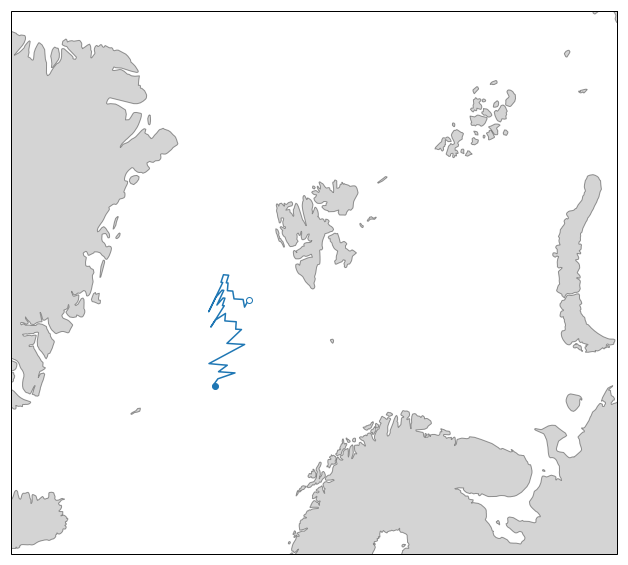

In [16]:
fig = plt.figure()
ax = lcc_map(fig, **LCC_KW)
random_track.plot_track(ax=ax, color=None)

#### Plot a single track without a map

##### a) In the given Axes

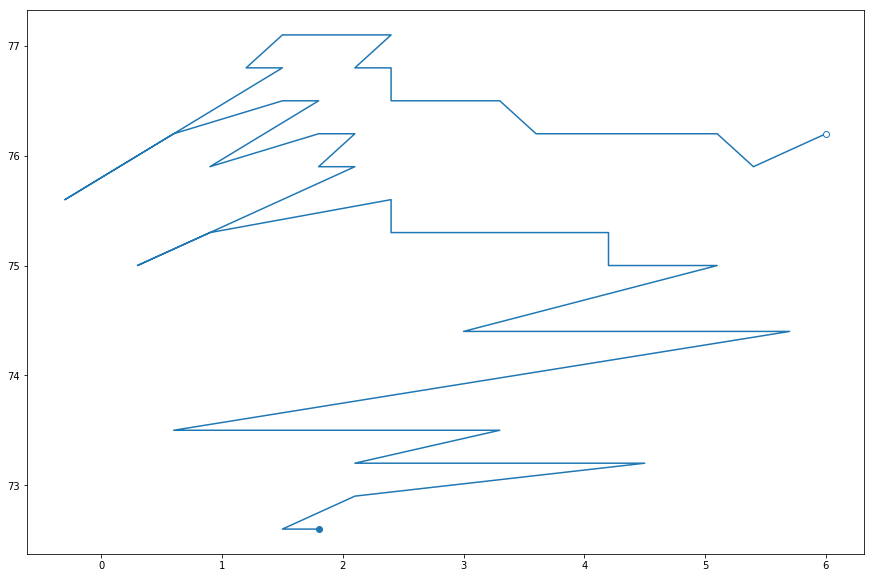

In [17]:
fig, ax = plt.subplots()
random_track.plot_track(ax=ax)

##### b) Or automatically create figure and axes in the `PlateCarree` projection

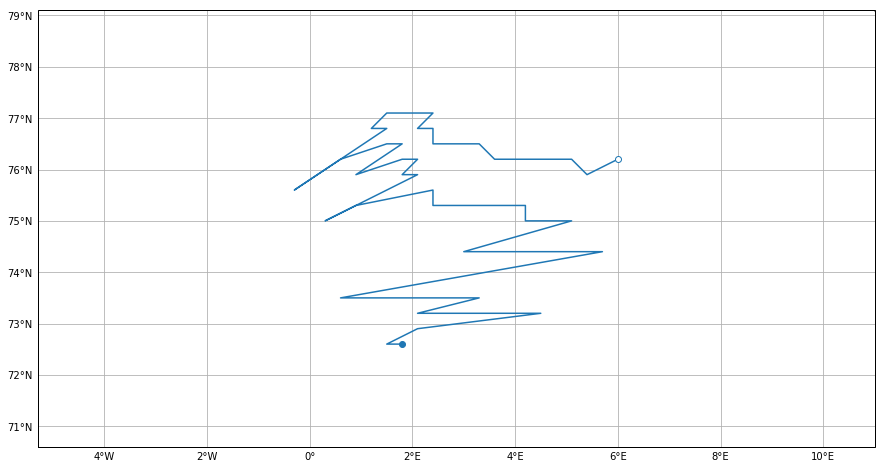

In [18]:
random_track.plot_track()

The function returns matplotlib axes object, so it can be used for further plotting.

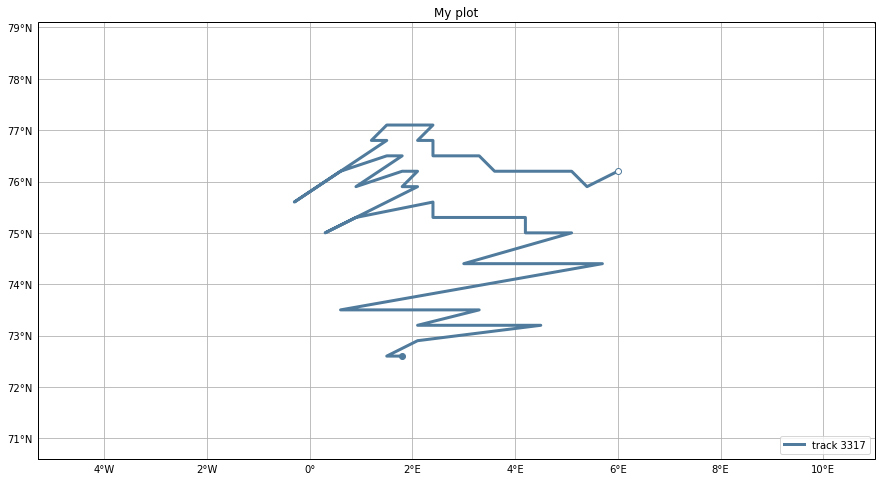

In [19]:
ax1 = random_track.plot_track(color='xkcd:stormy blue',
                              linewidth=3,
                              label=f'track 3317')
ax1.legend(loc=4)
ax1.set_title('My plot');

## Plot all tracks from TrackRun

In [20]:
subsets_and_colors = [
    ('all', '#424242'),
    ('good', 'C0'),
    ('pmc', 'C1')
]

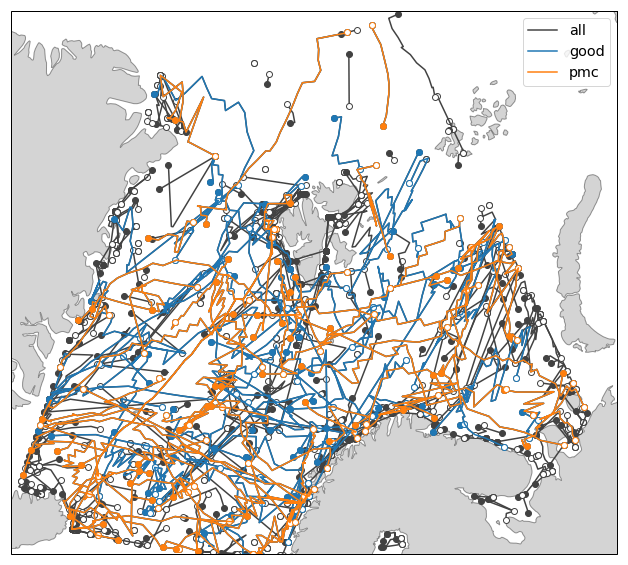

In [21]:
fig = plt.figure()
ax = lcc_map(fig, **LCC_KW)

handles, labels = [], []
for subset_label, color in subsets_and_colors:
    sub = TR[subset_label]
    for (_, track) in sub.groupby('track_idx'):
        track.plot_track(ax=ax, color=color, label=subset_label)
        
labels, handles = [list(getattr({j: i
                                for i, j in zip(*ax.get_legend_handles_labels())},
                                m)())
                   for m in ['keys', 'values']]
ax.legend(handles, labels, fontsize='x-large', loc=1);